**Background:** The average number of credit cards a consumer holds in their wallet is seven. The types of cards can vary but all point to one conclusion: consumers will continue to spend as long as the funds are available. I will explore data for credit card customers from a large bank. The bank is not specified.

**Data Source:** The dataset is downloaded from Kaggle.com (https://www.kaggle.com/sakshigoyal7/credit-card-customers.
The data contains 10,127 records and 21 columns.

**Objective:** Determine the main contributing factors to income based on gender. Conduct statistical test to compare if there is a significant difference in income between Male and Female.

**Hypothesis:** 

* Ho: μ1 = μ2
* Ha: μ1 ≠ μ2

**Observations:** The findings from this analysis would improve the conversations between employers and employees in the workspace. The findings will also help banking companies with their credit card approval process.

**Methods:** Using Pandas - Data visualization - Descriptive Statistics & Histogram - Hypothesis testing using two sample T-Test


**Loading Data to Colab Notebook** 


---


Once the data was downloaded to my local machine, I uploaded the data to my Google drive and loaded it into to Colab using Python codes.

In [1]:
# Step 1: Import the libraries
import pandas as pd
import numpy as np
import random 
from google.colab import drive

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib.ticker import PercentFormatter

In [2]:
# Read in the Google Drive-mounted
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Review data elements
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/CCcustomers.csv')

df.rename(columns={'CLIENTNUM': 'Client_Number'}, inplace=True)
df.head()

,Client_Number,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# Review the number of variables in the data
df.shape

(10127, 21)

In [5]:
# Review data types for the purpose of analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_Number             10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Analysis: Distribution of Income_Category and Gender**


---



In [6]:
# What is the distribution for Gender?
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [7]:
# What is the distribution for Income_Category?
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [8]:
# What is the distribution for Gender in Income_Category?
df.groupby(['Gender', 'Income_Category']).size()

Gender  Income_Category
F       $40K - $60K        1014
        Less than $40K     3284
        Unknown            1060
M       $120K +             727
        $40K - $60K         776
        $60K - $80K        1402
        $80K - $120K       1535
        Less than $40K      277
        Unknown              52
dtype: int64

Females make less income than Males. The income for Females does not go above $60k.

In [9]:
# Define function for individual income values.
def A_Income(Income_Category):
  if '$120K +' in Income_Category:
    return random.randint(120000, 250000)
  if '$80K - $120K' in Income_Category:
    return random.randint(80000, 120000)
  if '$60K - $80K' in Income_Category:
    return random.randint(60000, 80000)
  if '$40K - $60K' in Income_Category:
    return random.randint(40000, 60000)
  if 'Less than $40K' in Income_Category:
    return random.randint(20000, 40000)
  if 'Unknown' in Income_Category:
    return '0'
  return A_Income

# Add new column
df['New_Income'] = df['Income_Category'].apply(A_Income)

In [10]:
# Convert New_Income from object to integer
df['New_Income'] = df['New_Income'].astype(int)

# Filter zero values
df = df[df['New_Income'] > 0]

In [11]:
# Separate the Gender
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']

# Define function for Gender values
def genbi(Gender):
  if 'M' in Gender:
    return 1
  if 'F' in Gender:
    return 2
  return genbi

# Add new column
df['Gender_Code'] = df['Gender'].apply(genbi)

# Store Gender and New_Income variables
genbi = df[['Gender', 'New_Income']]

# Convert Gender_Code from object to integer
df['Gender_Code'] = df['Gender_Code'].astype(int)

In [12]:
# What is the average amount of income for Males and Females?
df_male['New_Income'].describe()

count      4717.000000
mean      91644.861777
std       47300.749567
min       20056.000000
25%       62053.000000
50%       78669.000000
75%      107974.000000
max      249656.000000
Name: New_Income, dtype: float64

In [13]:
df_female['New_Income'].describe()

count     4298.000000
mean     34696.672638
std      10175.220578
min      20026.000000
25%      26454.750000
50%      33066.000000
75%      39608.250000
max      59992.000000
Name: New_Income, dtype: float64

The Average income for Males is two times more than Females.

**Testing Hypothesis**


---


The purpose of the test is to identify any significant difference between in income between Females and Males. 

The hypotheses for this test are as follows:

Ho = There is not a significant difference in income between Females and Males

Ha = There is a significant difference in income between Females and Males

Perform a two sample t-Test using Ttest.ttest_ind().

In [14]:
# Is there a significant difference in income between Females and Males?
stats.ttest_ind(df_female['New_Income'], df_male['New_Income'])

Ttest_indResult(statistic=-77.3169831772608, pvalue=0.0)

In [15]:
# Is the p-value less than 0.05?
0.0 < 0.05

True

**Conclusion**


---


Reject the null hypothesis where p-value < 0.05, and conclude that there is a significant difference in income between Females and Males.

**Analysis: Distribution of Income**


---


Plot a histogram of the New_Income column.

Review the skewness and kurtosis.



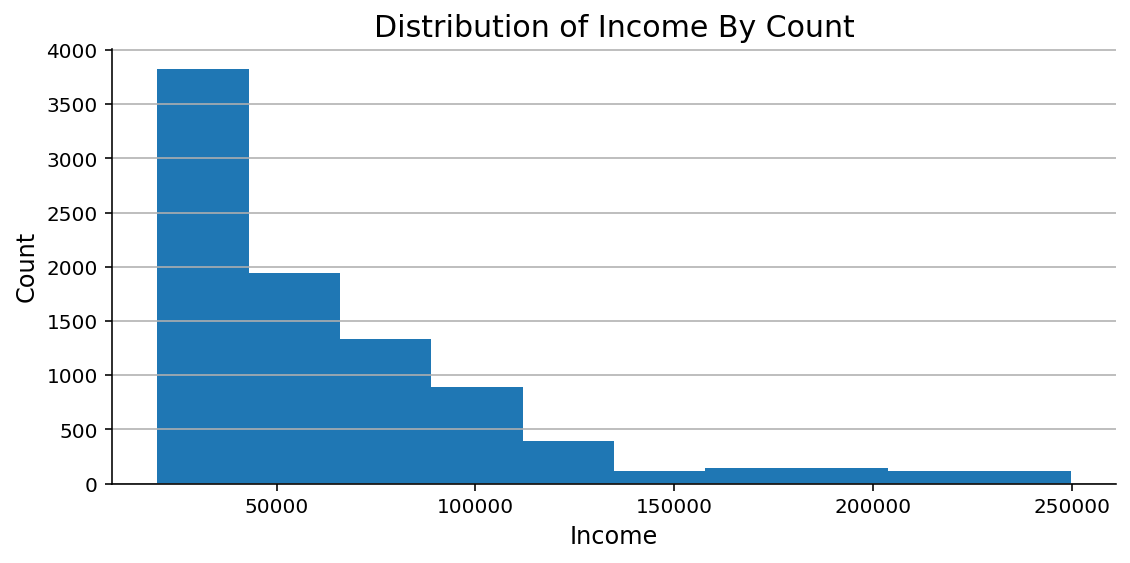

In [16]:
# Does the distribution of Income follow a normal distribution?
plt.figure(figsize=(9, 4))
plt.title('Distribution of Income By Count', size=15)
df['New_Income'].hist()
plt.xlabel('Income', size=12)
plt.ylabel('Count', size=12)
plt.grid(which='major', axis='x')
sns.despine();

In [17]:
# skewness along the index axis 
genbi.skew()

New_Income    1.824176
dtype: float64

In [18]:
genbi.kurt() 

New_Income    3.547128
dtype: float64

Is the Skewness greater than 1 or lower than -1? Is the Kurtosis greater than 1 or lower than -1?

One measure is above the recomended range for Skewness and Kurtosis.

It is not good to assume a normal distribution for testing the hypothesis. The distribution is considered nonnormal.

**Analysis: Compare groups to find differences in Income**

---

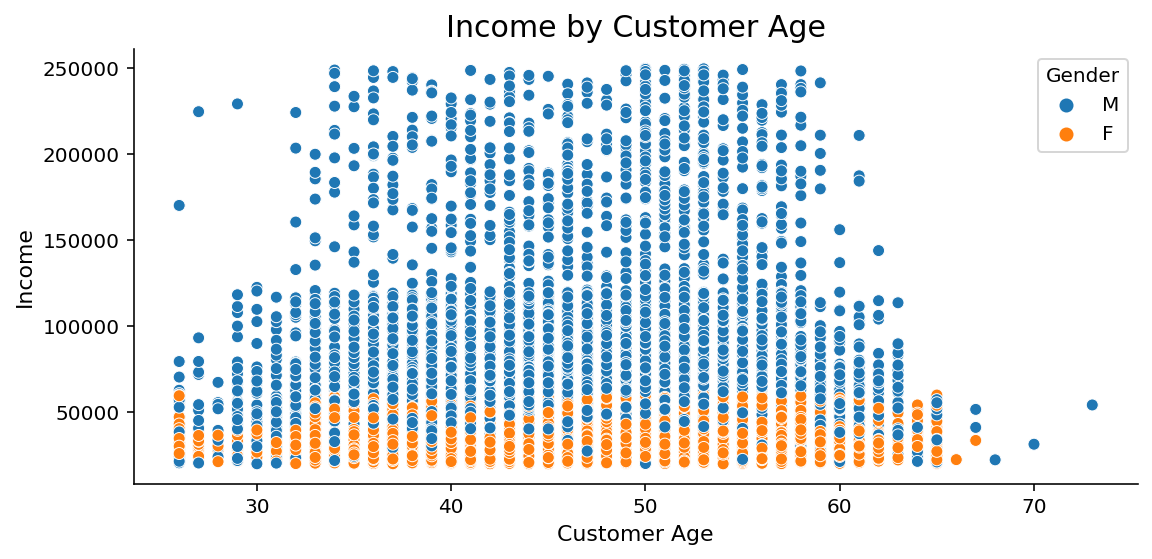

In [33]:
# Income by age for Females and Males
plt.figure(figsize=(9, 4))
plt.title('Income by Customer Age', size=15)
plt.xlabel('Customer Age', size=11)
plt.ylabel('Income', size=11)
color = ['blue', 'pink']
sns.scatterplot(x="Customer_Age", y="New_Income", hue='Gender', data=df)
sns.despine();

**Conclusion**


---


The age of Males and Females are primarily spread from late 20s to mid-60's. 

Males earn higher income across different ages.

In [20]:
# Define function for Education Level
def edlevel(Education_Level):
  if 'Doctorate' in Education_Level:
    return 1
  if 'Post-Graduate' in Education_Level:
    return 2
  if 'Graduate' in Education_Level:
    return 3
  if 'College' in Education_Level:
    return 4
  if 'High School' in Education_Level:
    return 5
  if 'Uneducated' in Education_Level:
    return 6
  if 'Unknown' in Education_Level:
    return 7
  return edlevel

# Add new column
df['Edu_Level'] = df['Education_Level'].apply(edlevel)

# Define function for Marital Status
def Ma_Status(Marital_Status):
  if 'Married' in Marital_Status:
    return 1
  if 'Divorced' in Marital_Status:
    return 2
  if 'Single' in Marital_Status:
    return 3
  if 'Unknown' in Marital_Status:
    return 4
  return Ma_Status

# Add new column
df['Ma_Status'] = df['Marital_Status'].apply(Ma_Status)

In [21]:
# Income by Education Level
#df.plot(x = 'New_Income', y = 'Education_Level', kind = "bar")
#plt.show()

In [22]:
df.head()

,Client_Number,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,New_Income,Gender_Code,Edu_Level,Ma_Status
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,64262,1,5,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,25067,2,3,3
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,119098,1,3,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,36084,2,5,4
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,64452,1,6,1


**Conclusion**


---


The age of Males and Females are primarily spread from late 20s to mid-60's. 

Males earn higher income across different ages.

In [41]:
meanbal = df['Total_Revolving_Bal'].mean()

KeyError: ignored

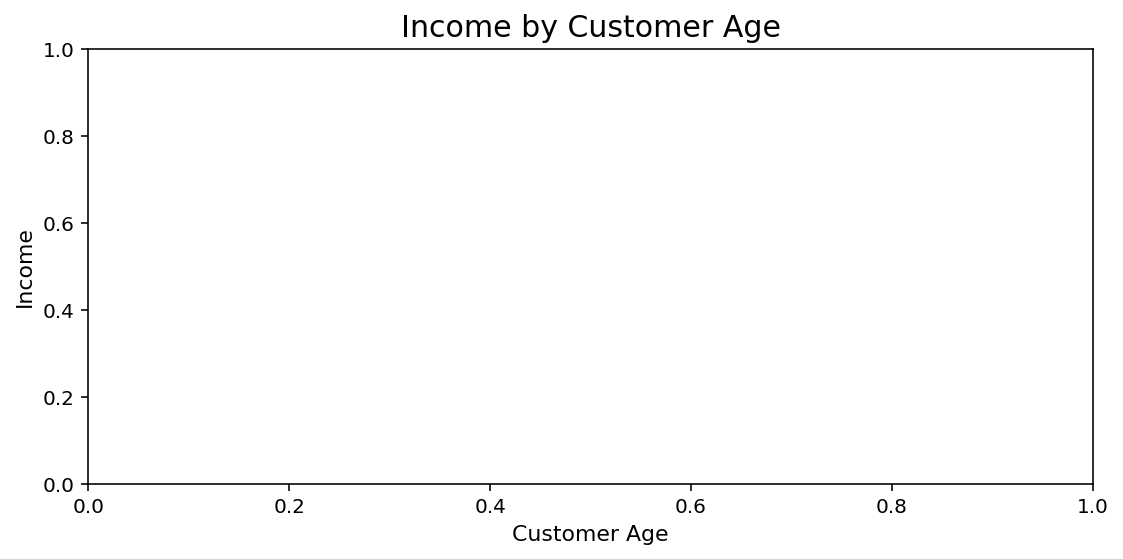

In [44]:
# Income by Total Revolving Balance

plt.figure(figsize=(9, 4))
plt.title('Income by Customer Age', size=15)
plt.xlabel('Customer Age', size=11)
plt.ylabel('Income', size=11)
color = ['blue', 'pink']
sns.barplot(x=, y="New_Income", hue='Gender', data=df)
sns.despine();


**Conclusion**


---


The age of Males and Females are primarily spread from late 20s to mid-60's. 

Males earn higher income across different ages.

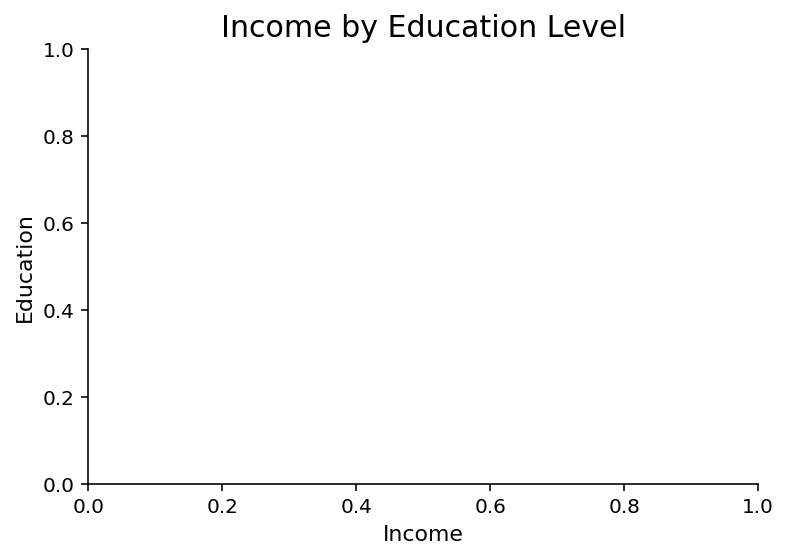

In [24]:
# Income by Marital Status
plt.title('Income by Education Level', size=15)
#plt.barh('Education_Level', 'New_Income', data=df)
plt.ylabel('Education', size=11)
plt.xlabel('Income', size=11)
sns.despine();


**Conclusion**


---


The age of Males and Females are primarily spread from late 20s to mid-60's. 

Males earn higher income across different ages.

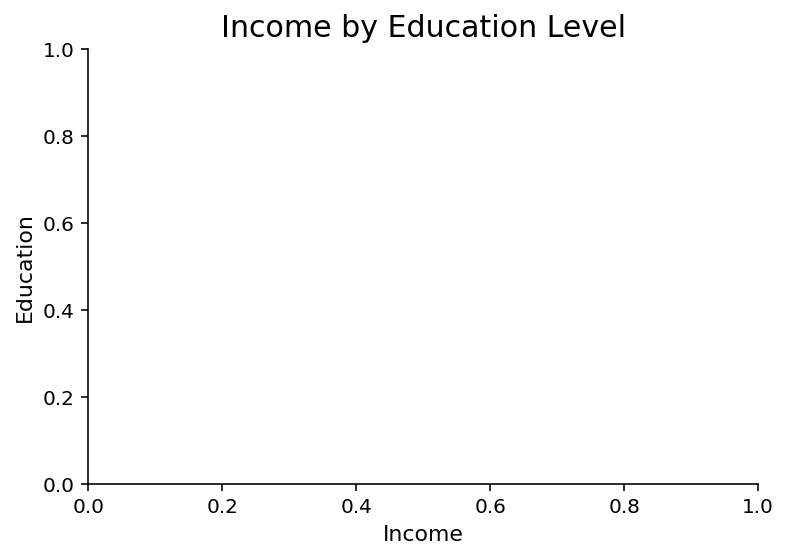

In [25]:
# Income by Dependents

plt.title('Income by Education Level', size=15)
#plt.barh('Education_Level', 'New_Income', data=df)
plt.ylabel('Education', size=11)
plt.xlabel('Income', size=11)
sns.despine();


**Conclusion**


---


The age of Males and Females are primarily spread from late 20s to mid-60's. 

Males earn higher income across different ages.

**Results**


---


*  Winter Months appear to have less accidents and fatalities

**Recommendations and Limitations**


---


Recommendations:
*  P


Limitations:
*  Aggregations used in my analysis are limited to counts but percentage level comparisons would produce more comparable results among groups, as would additional information such as alcohol or drug use, texting, etc. (if applicable).

*  Collisions will always occur as long as humans are in promary ontrol of automobiles; therefore, it is unrealistic to believe that all collisions can be prevented.
